<a href="https://colab.research.google.com/github/Jin0331/TA/blob/master/Bigdata_Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **빅데이터개론 Lab 7 - 데이터 분석 기법 기초 2**

- - -

참고자료 : https://www.notion.so/1e83a70a95474931beb46e23b8289b70

### **<단순선형회귀분석>**

https://freshrimpsushi.tistory.com/648?category=763106


```
1. 상관분석 : 변수들이 서로 얼마나 밀접하게 직선적인 관계를 가지고 있는지를 분석하는 통계적 기법

2. 회귀분석 : 한 개 또는 그 이상의 변수들(반응변수 또는 종속변수)에 대하여 다른 한 변수(설명변수 또는 독립변수) 사이의 관계를 수학적인 모형을 이용하여 설명하고 예측하는 분석 기법

쉽게 말하자면, 상관분석에서는 산점도의 점들의 분포를 통해 일정한 패턴을 확인한 후, 상관계수를 구하여 두 변수 간의 선형관계를 알 수 있었다. 
더 나아가 이 일정한 패턴을 활용하여 무엇인가를 예측하는 분석을 회귀분석이라고 보면 된다.
```

<br>
<br>
<br>

<img src="https://t1.daumcdn.net/cfile/tistory/231B994658BE0C5520" width="600" height="100">

* 회귀식의 추정

두 변수 X와 Y의 관계에 적합한 회귀식을 구하기 위해서는 관측된 값으로부터 회귀계수 β0(절편,intercept)와 intercept)와 β1(기울기, beta)의 값을 추정하여야 함.!

#### **A. 예제**

---


In [126]:
install.packages(c("tidyverse", "data.table"))
library(tidyverse)
library(data.table)

# 출력 그래프 크기 변경
library(repr)
options(repr.plot.width=10, repr.plot.height=10)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# https://github.com/kassambara/datarium
install.packages("devtools")
devtools::install_github("kassambara/datarium")
library(datarium)

In [131]:
# 세 개의 광고 매체(youtube, facebook, 신문)가 판매에 미치는 영향을 포함하는 데이터 프레임
data("marketing", package = "datarium")
str(marketing)
marketing %>% summary()

'data.frame':	200 obs. of  4 variables:
 $ youtube  : num  276.1 53.4 20.6 181.8 217 ...
 $ facebook : num  45.4 47.2 55.1 49.6 13 ...
 $ newspaper: num  83 54.1 83.2 70.2 70.1 ...
 $ sales    : num  26.5 12.5 11.2 22.2 15.5 ...


    youtube          facebook       newspaper          sales      
 Min.   :  0.84   Min.   : 0.00   Min.   :  0.36   Min.   : 1.92  
 1st Qu.: 89.25   1st Qu.:11.97   1st Qu.: 15.30   1st Qu.:12.45  
 Median :179.70   Median :27.48   Median : 30.90   Median :15.48  
 Mean   :176.45   Mean   :27.92   Mean   : 36.66   Mean   :16.83  
 3rd Qu.:262.59   3rd Qu.:43.83   3rd Qu.: 54.12   3rd Qu.:20.88  
 Max.   :355.68   Max.   :59.52   Max.   :136.80   Max.   :32.40  

In [132]:
marketing %>% as_tibble() %>% show()

# A tibble: 200 x 4
   youtube facebook newspaper sales
     <dbl>    <dbl>     <dbl> <dbl>
 1   276.     45.4       83.0 26.5 
 2    53.4    47.2       54.1 12.5 
 3    20.6    55.1       83.2 11.2 
 4   182.     49.6       70.2 22.2 
 5   217.     13.0       70.1 15.5 
 6    10.4    58.7       90    8.64
 7    69      39.4       28.2 14.2 
 8   144.     23.5       13.9 15.8 
 9    10.3     2.52       1.2  5.76
10   240.      3.12      25.4 12.7 
# … with 190 more rows


* **Scatter Plot(산점도)와 Correlation(상관계수)**

In [ ]:
# youtube
marketing %>% ggplot(aes(x = youtube, y = sales)) + geom_point(size = 3, color = "red")

# facebook
marketing %>% ggplot(aes(x = facebook, y = sales)) + geom_point(size = 3, color = "blue")

# newspaper
marketing %>% ggplot(aes(x = newspaper, y = sales)) + geom_point(size = 3, color = "gray")

In [135]:
# cor를 이용한 상관계수 구하기
cor(marketing)

,youtube,facebook,newspaper,sales
youtube,1.00000000,0.05480866,0.05664787,0.7822244
facebook,0.05480866,1.00000000,0.35410375,0.5762226
newspaper,0.05664787,0.35410375,1.00000000,0.2282990
sales,0.78222442,0.57622257,0.22829903,1.0000000


In [136]:
install.packages("GGally")
install.packages("PerformanceAnalytics")
install.packages("corrr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



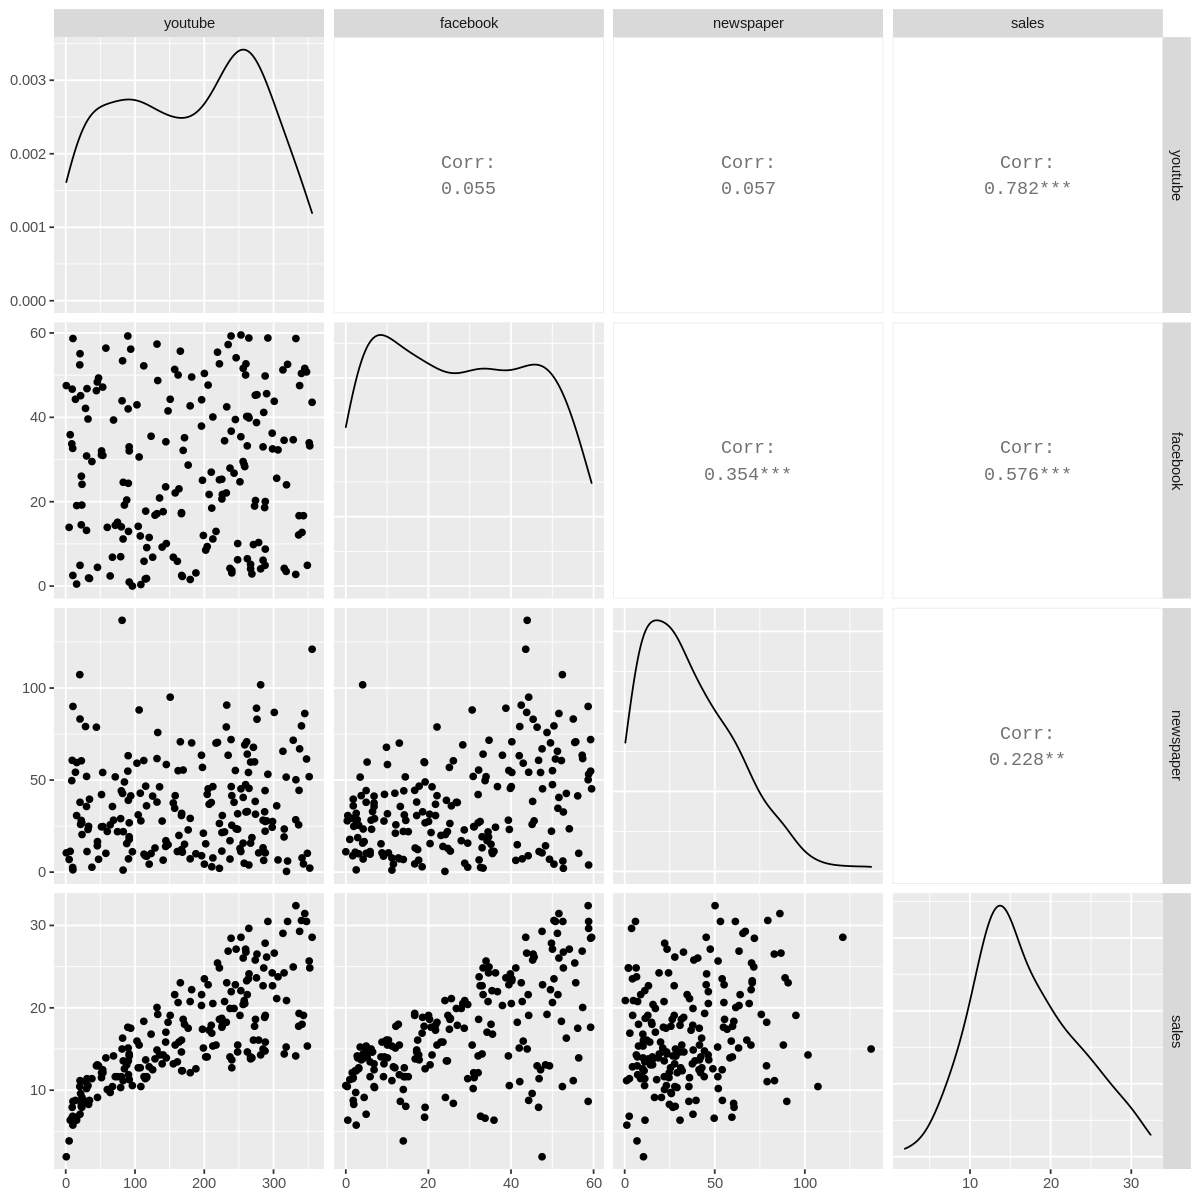

In [141]:
GGally::ggpairs(marketing)

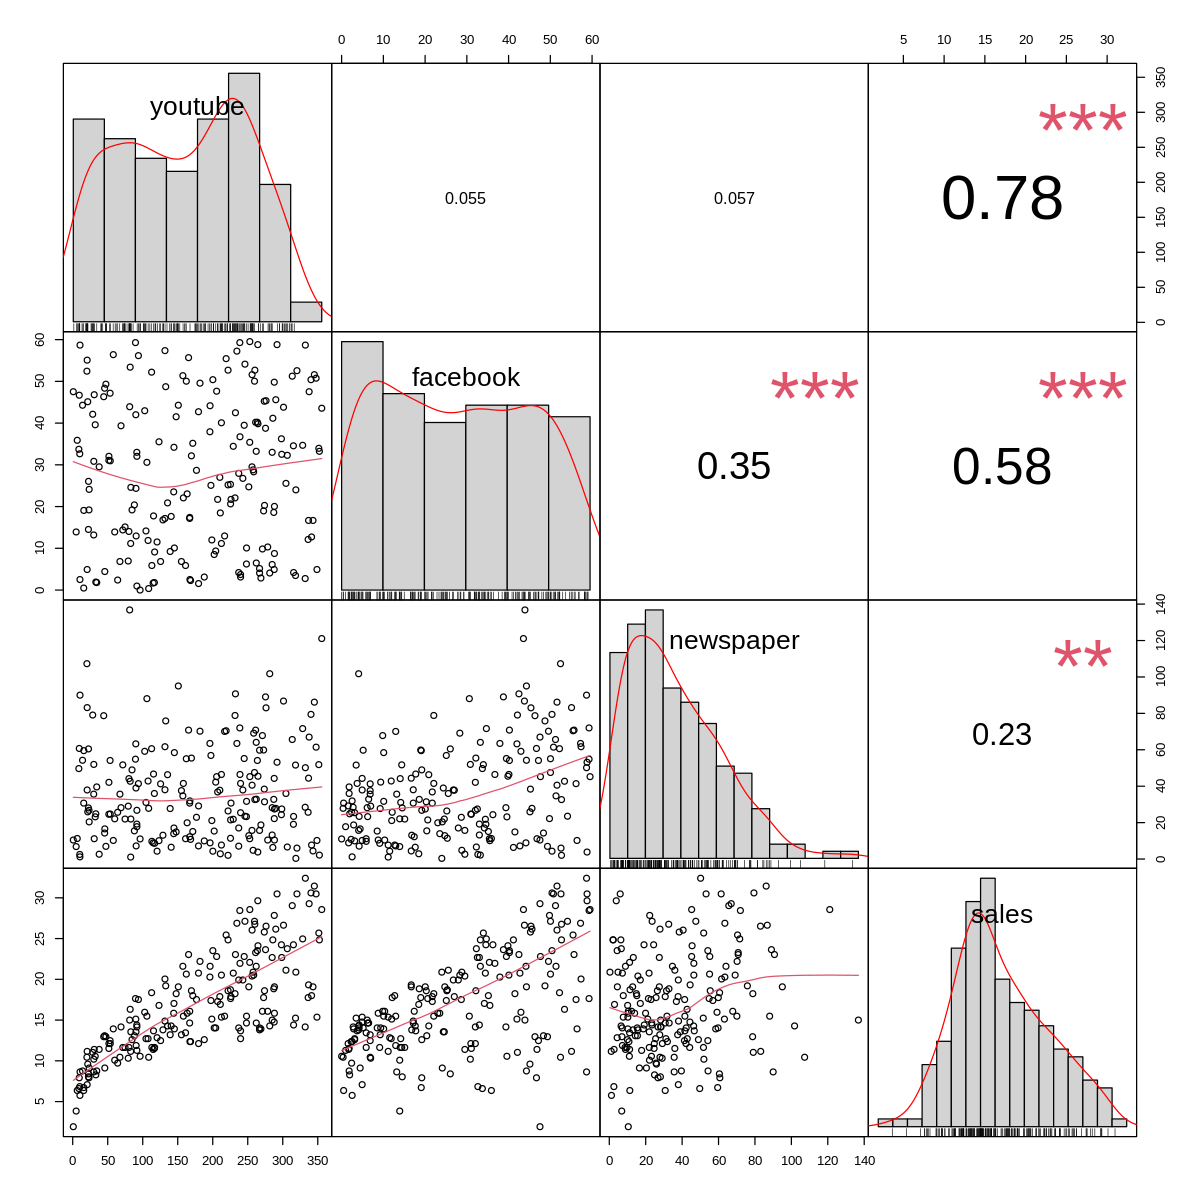

In [142]:
PerformanceAnalytics::chart.Correlation(marketing, histogram=TRUE, pch=19)


Correlation method: 'pearson'
Missing treated using: 'pairwise.complete.obs'




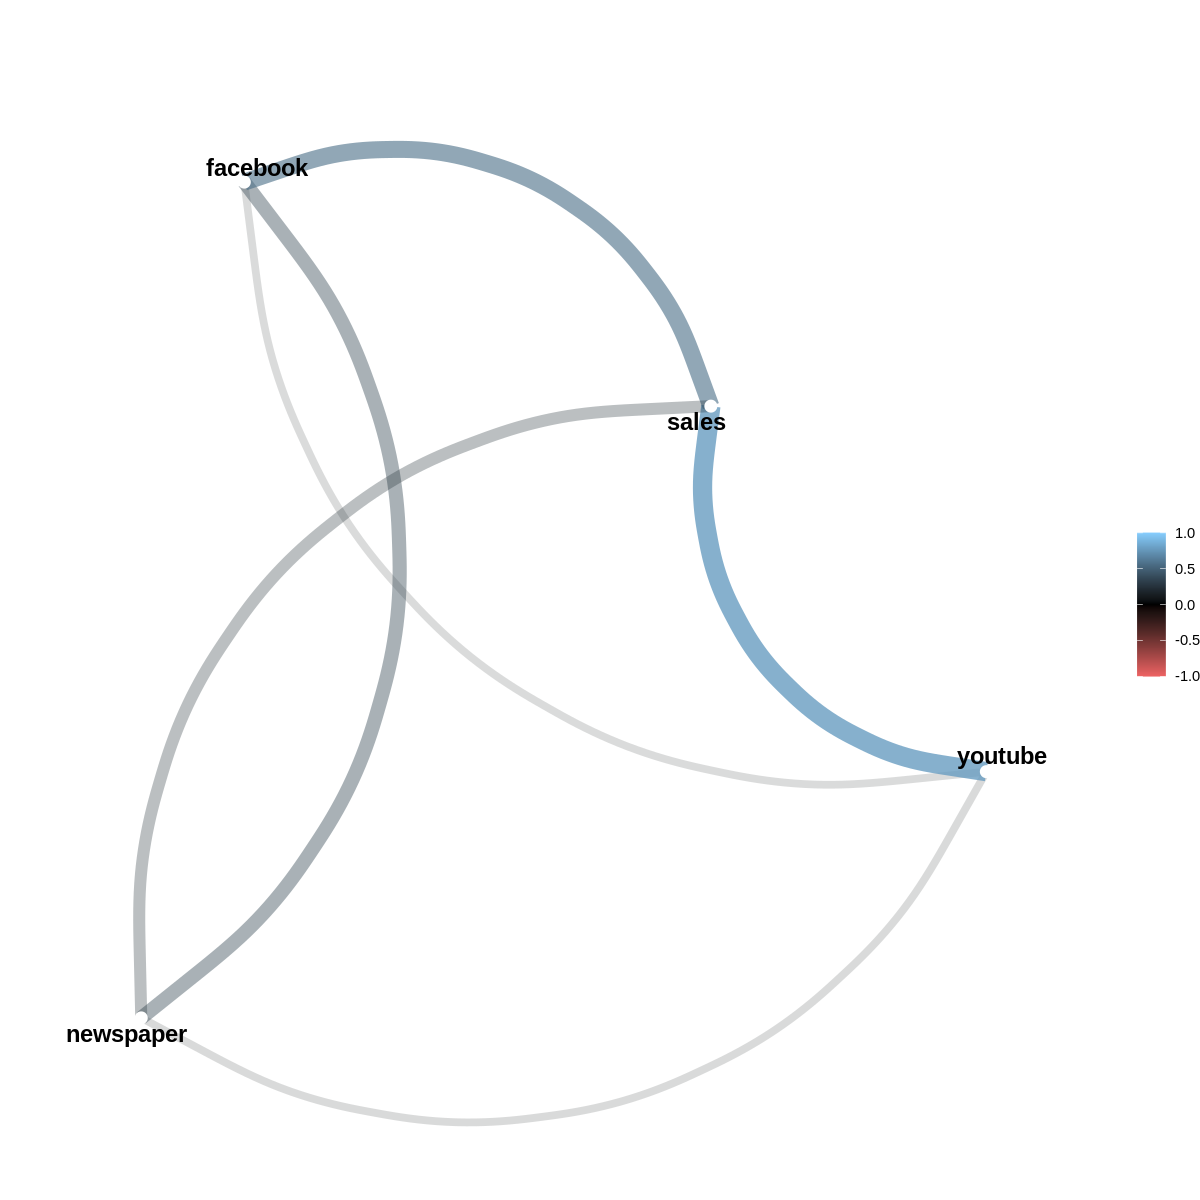

In [143]:
library(corrr)

marketing %>% 
  correlate() %>%
  network_plot(min_cor = 0,  colours = c("indianred2", "black", "skyblue1"))

* **단순 선형회귀(simple linear regression)**

* lm(linear model)

```
lm(formula = [Y ~ X + ... ], data = [ ] )
formula : 반응변수(Y) ~ 설명변수(X1 + X2 + ...) 의 형태로 지정한 식
data : 변수가 포함된 데이터 프레임
```


In [144]:
# youtube(설명변수))에 따른 sales(반응변수)의 관계
m1 <- lm(formula = sales ~ youtube, data = marketing)

# facebook(설명변수))에 따른 sales(반응변수)의 관계
m2 <- lm(formula = sales ~ facebook, data = marketing)

# newspaper(설명변수))에 따른 sales(반응변수)의 관계
m3 <- lm(formula = sales ~ newspaper, data = marketing)

* **회귀모형의 적합도 파악**


    (1) 결과의 해석
        https://freshrimpsushi.tistory.com/652
    (2) R 제곱과 수정된 R 제곱의 차이
        https://chukycheese.github.io/statistics/adjusted-r2/


* 결정계수(coefficient of determination)

  회귀직선의 적합성 측정계수

* 잔차와 결정계수

  1. 잔차의 변동이 0에 가까워지면

    (1) 결정계수는 1에 가까워짐

    (2) "실제 데이터에 대한 회귀직선의 적합성이 좋다"

    (3) 회귀직선의 유용성이 높아짐

  2. 잔차의 변동이 커지게 되면

    (1) 결정계수는 0에 가까워짐

    (2) "실제 데이터에 대한 회귀직선의 적합성이 나쁘다"

    (3) 회귀직선의 유용성이 낮아짐

In [145]:
print("sales ~ youtube")
summary(m1)

[1] "sales ~ youtube"



Call:
lm(formula = sales ~ youtube, data = marketing)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0632  -2.3454  -0.2295   2.4805   8.6548 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.439112   0.549412   15.36   <2e-16 ***
youtube     0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.91 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


* m1에서 ``β0 = 8.439112, β1 = 0.047537 으로부터 sales = 8.439112 + 0.047537 * youtube`` 라는 회귀식 도출

* youtbue가 1 증가할 때마다 sales는 0.047537만큼 증가


In [146]:
print("sales ~ facebook")
summary(m2)

[1] "sales ~ facebook"



Call:
lm(formula = sales ~ facebook, data = marketing)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.8766  -2.5589   0.9248   3.3330   9.8173 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.17397    0.67548  16.542   <2e-16 ***
facebook     0.20250    0.02041   9.921   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.13 on 198 degrees of freedom
Multiple R-squared:  0.332,	Adjusted R-squared:  0.3287 
F-statistic: 98.42 on 1 and 198 DF,  p-value: < 2.2e-16


* m2에서 ``β0 = 11.17397, β1 = 0.20250 으로부터 sales = 8.439112 + 0.20250 * facebook`` 라는 회귀식 도출

* facebook이 1 증가할 때마다 sales는 0.20250만큼 증가

In [147]:
print("sales ~ newspaper")
summary(m3)

[1] "sales ~ newspaper"



Call:
lm(formula = sales ~ newspaper, data = marketing)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.473  -4.065  -1.007   4.207  15.330 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.82169    0.74570   19.88  < 2e-16 ***
newspaper    0.05469    0.01658    3.30  0.00115 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.111 on 198 degrees of freedom
Multiple R-squared:  0.05212,	Adjusted R-squared:  0.04733 
F-statistic: 10.89 on 1 and 198 DF,  p-value: 0.001148


* m3에서 ``β0 = 11.17397, β1 = 0.20250 으로부터 sales = 8.439112 + 0.05469  * newpaper`` 라는 회귀식 도출

* newpaper 1 증가할 때마다 sales는 0.05469 만큼 증가

* 유용한 패키지

In [148]:
#https://moderndive.github.io/moderndive/
install.packages("moderndive")
library(moderndive)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* get_regression_points을 이용한 예측값과 잔차(residual) 확인하기

In [ ]:
moderndive::get_regression_points(m1)

* **회귀선**

 - geom_abline, coef을 이용한 방법

In [151]:
coef(m1)

(Intercept)     youtube 
 8.43911226  0.04753664

In [152]:
coef(m1)[1]
coef(m1)[2]

(Intercept) 
   8.439112

youtube 
0.04753664

In [ ]:
# ggplot2
marketing %>% ggplot(aes(x = youtube, y = sales)) + 
 geom_point(color = "tomato") +
 geom_abline(intercept = coef(m1)[1], slope = coef(m1)[2], color = "green", size = 1.5)

marketing %>% ggplot(aes(x = facebook, y = sales)) + 
 geom_point(color = "blue") +
 geom_abline(intercept = coef(m2)[1], slope = coef(m2)[2], color = "green", size = 1.5)

 marketing %>% ggplot(aes(x = newspaper, y = sales)) + 
 geom_point(color = "black") +
 geom_abline(intercept = coef(m3)[1], slope = coef(m3)[2], color = "green", size = 1.5)

  - stat_smooth() stat_smooth(method = 'lm') 을 이용한 방법

In [ ]:
# ggplot2
marketing %>% ggplot(aes(x = youtube, y = sales)) + 
 geom_point(color = "tomato") +
 stat_smooth(method = 'lm', color = "green")

marketing %>% ggplot(aes(x = facebook, y = sales)) + 
 geom_point(color = "blue") +
 stat_smooth(method = 'lm', se = F, color = "green")

 marketing %>% ggplot(aes(x = newspaper, y = sales)) + 
 geom_point(color = "black") +
 stat_smooth(method = 'lm', se = F, color = "green")

- predict3d 패키지를 이용한 방법

In [155]:
install.packages("predict3d")
library(predict3d)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



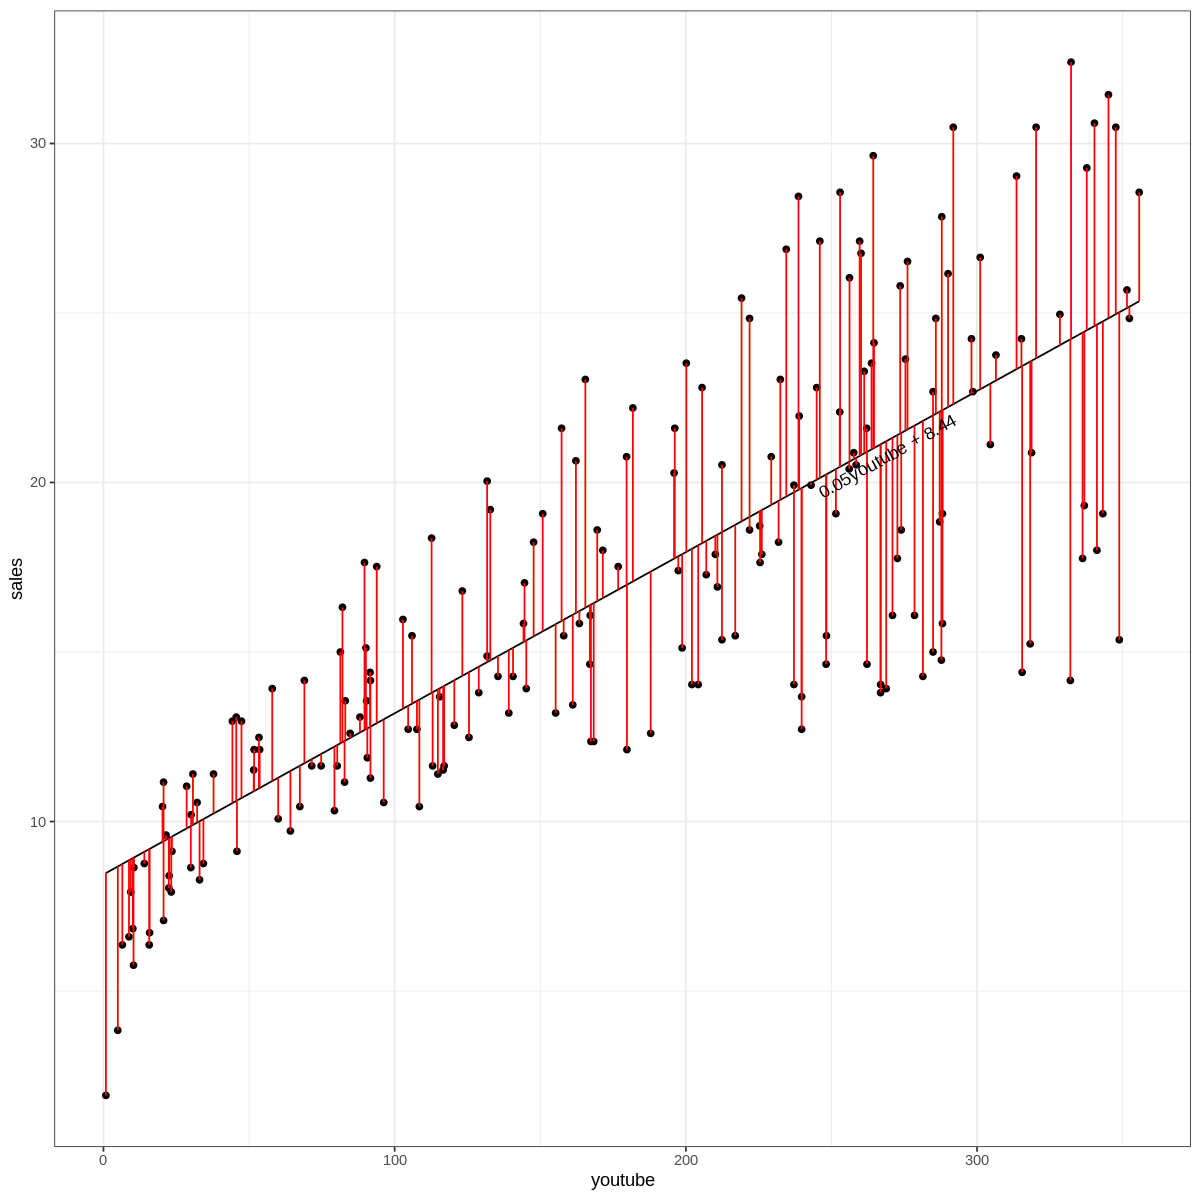

In [168]:
ggPredict(m1,xpos=0.75,vjust=1.5, show.error = TRUE)

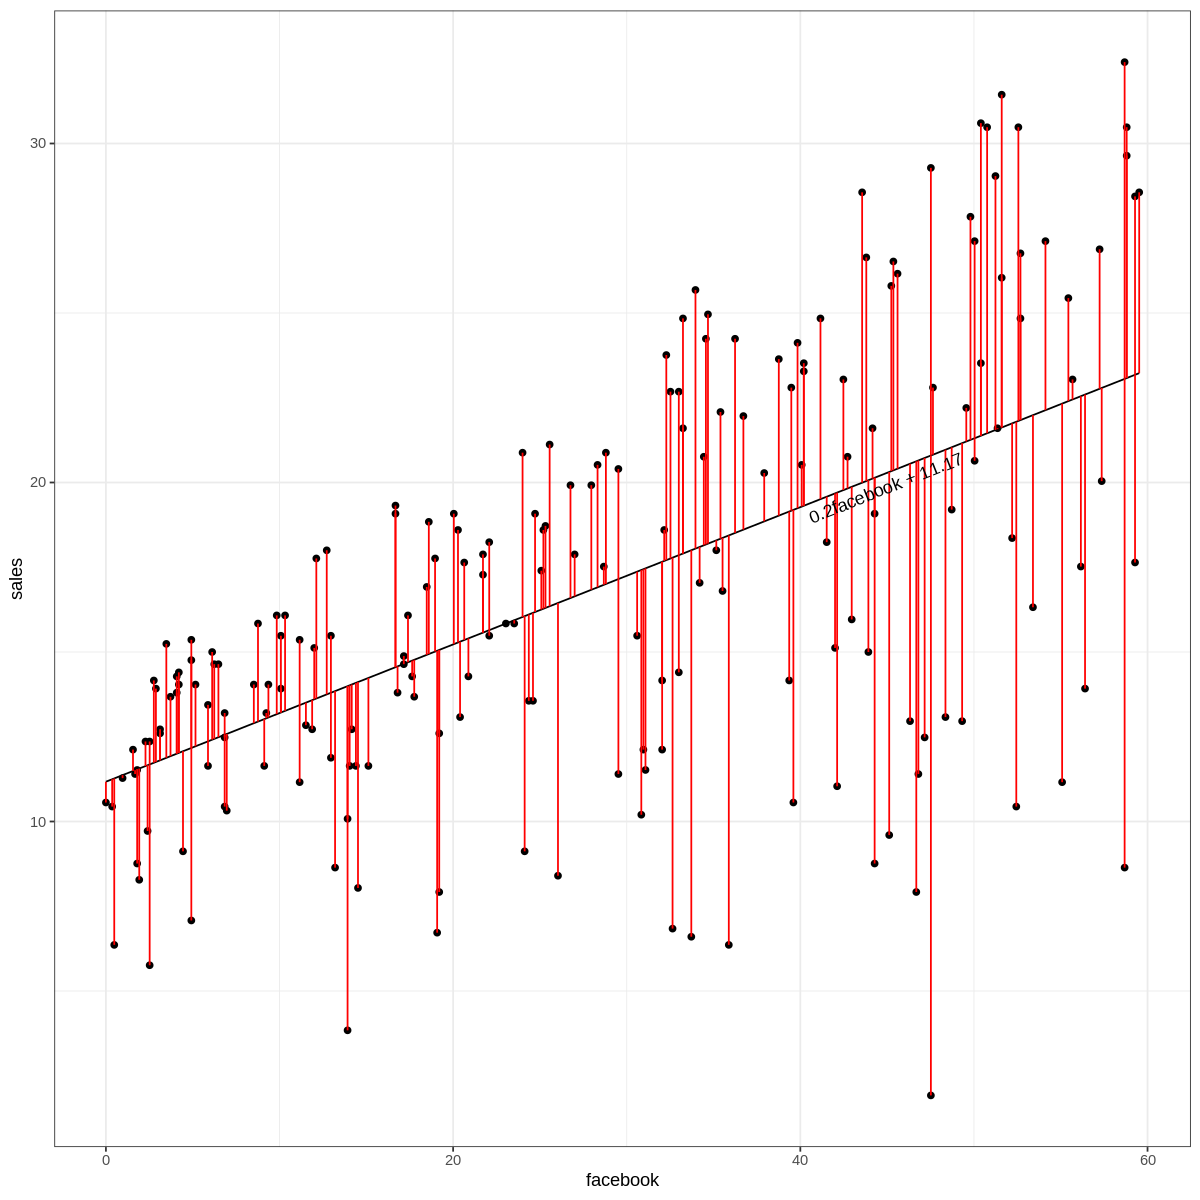

In [169]:
ggPredict(m2,xpos=0.75,vjust=1.5, show.error = TRUE)

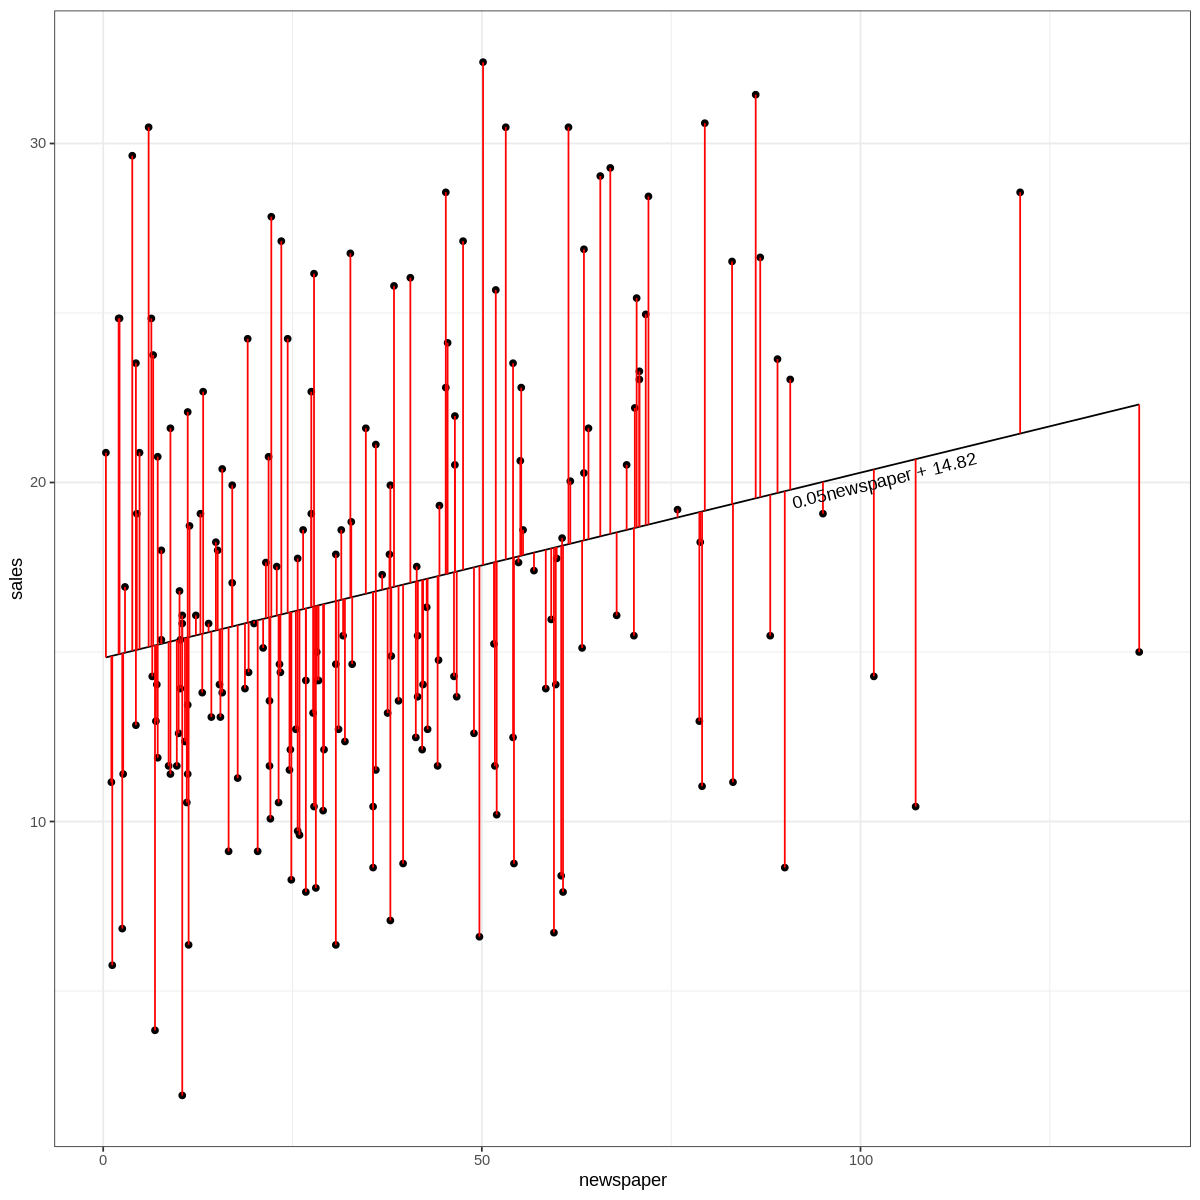

In [170]:
ggPredict(m3,xpos=0.75,vjust=1.5, show.error = TRUE)